## Problem Statement
Weather in Szeged 2006-2016: Is there a relationship between humidity and temperature? What about between humidity and apparent temperature? Can you predict the apparent temperature given the humidity?

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn

import statsmodels.formula.api as sfa

In [3]:
#read the data
df_data = pd.read_csv('weatherHistory.csv')
df_data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [4]:
#Rows and Columns
df_data.shape

(96453, 12)

In [5]:
#information
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [6]:
#null values
print(df_data.isna().sum())

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [7]:
#null values in %
print(round((df_data.isna().sum()/ len(df_data)) * 100,2))

Formatted Date              0.00
Summary                     0.00
Precip Type                 0.54
Temperature (C)             0.00
Apparent Temperature (C)    0.00
Humidity                    0.00
Wind Speed (km/h)           0.00
Wind Bearing (degrees)      0.00
Visibility (km)             0.00
Loud Cover                  0.00
Pressure (millibars)        0.00
Daily Summary               0.00
dtype: float64


In [8]:
#finding duplicate values
df_data.duplicated().value_counts()

False    96429
True        24
dtype: int64

In [9]:
#five point summary
df_data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [10]:
for i in df_data:
    print(i,df_data[i].nunique())

Formatted Date 96429
Summary 27
Precip Type 2
Temperature (C) 7574
Apparent Temperature (C) 8984
Humidity 90
Wind Speed (km/h) 2484
Wind Bearing (degrees) 360
Visibility (km) 949
Loud Cover 1
Pressure (millibars) 4979
Daily Summary 214


In [11]:
cat = list(df_data.select_dtypes('O'))
cat

['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary']

In [12]:
num = list(df_data.select_dtypes(np.number))
num

['Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)']

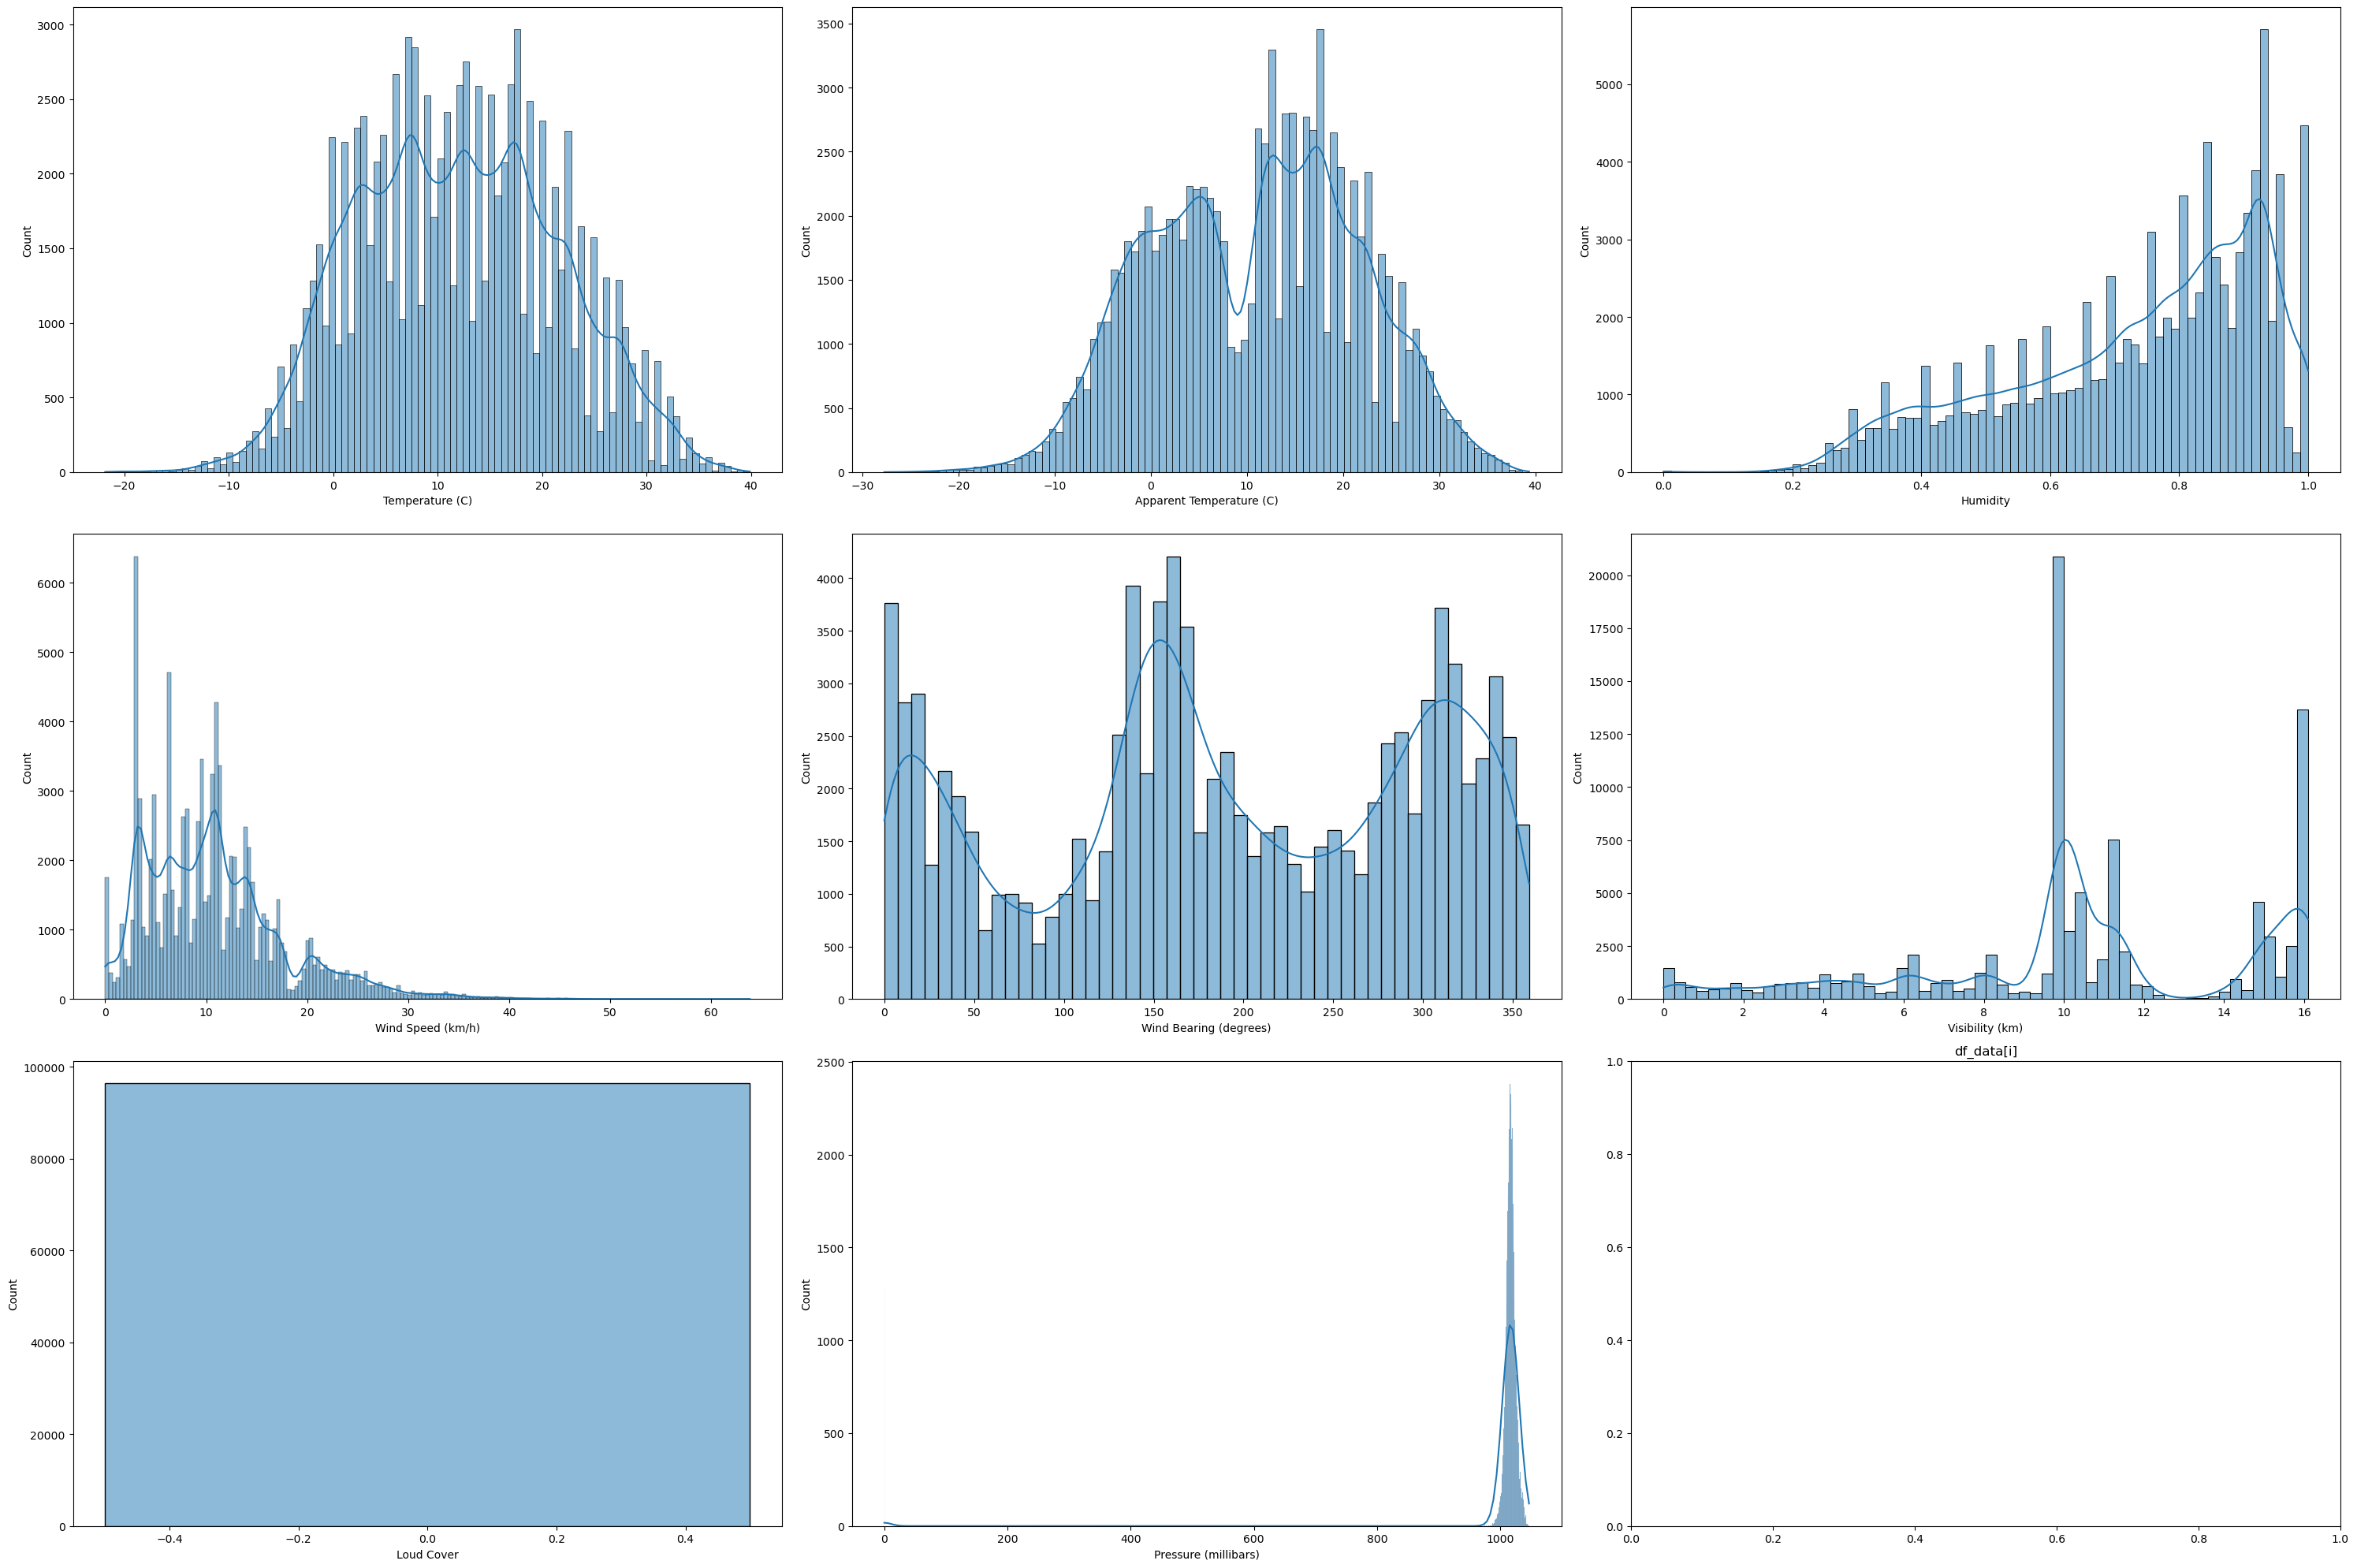

In [13]:
#EDA
#Univariate Analysis for Numerical
fig,ax = plt.subplots(3,3,figsize = (30,20))

for i , subplot in zip(num,ax.flatten()):
    sns.histplot(df_data[i],ax =subplot,kde = True)
    plt.title('df_data[i]')
    
plt.tight_layout()
plt.show()

In [14]:
for i in num:
    print(i,df_data[i].skew())

Temperature (C) 0.09412658235198375
Apparent Temperature (C) -0.05730229860439617
Humidity -0.715880427565631
Wind Speed (km/h) 1.1134929678251166
Wind Bearing (degrees) -0.15464320132703985
Visibility (km) -0.4987118639375199
Loud Cover 0
Pressure (millibars) -8.422506486163188


In [15]:
df = df_data.copy()

In [16]:
#Need of Feature extraction
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],errors='coerce', utc=True) 

In [17]:
df['Time'] = df['Formatted Date'].dt.hour

df['Month'] = df['Formatted Date'].dt.month

df['Day'] = df['Formatted Date'].dt.day

df['Year'] = df['Formatted Date'].dt.year

In [18]:
cat.remove('Formatted Date')

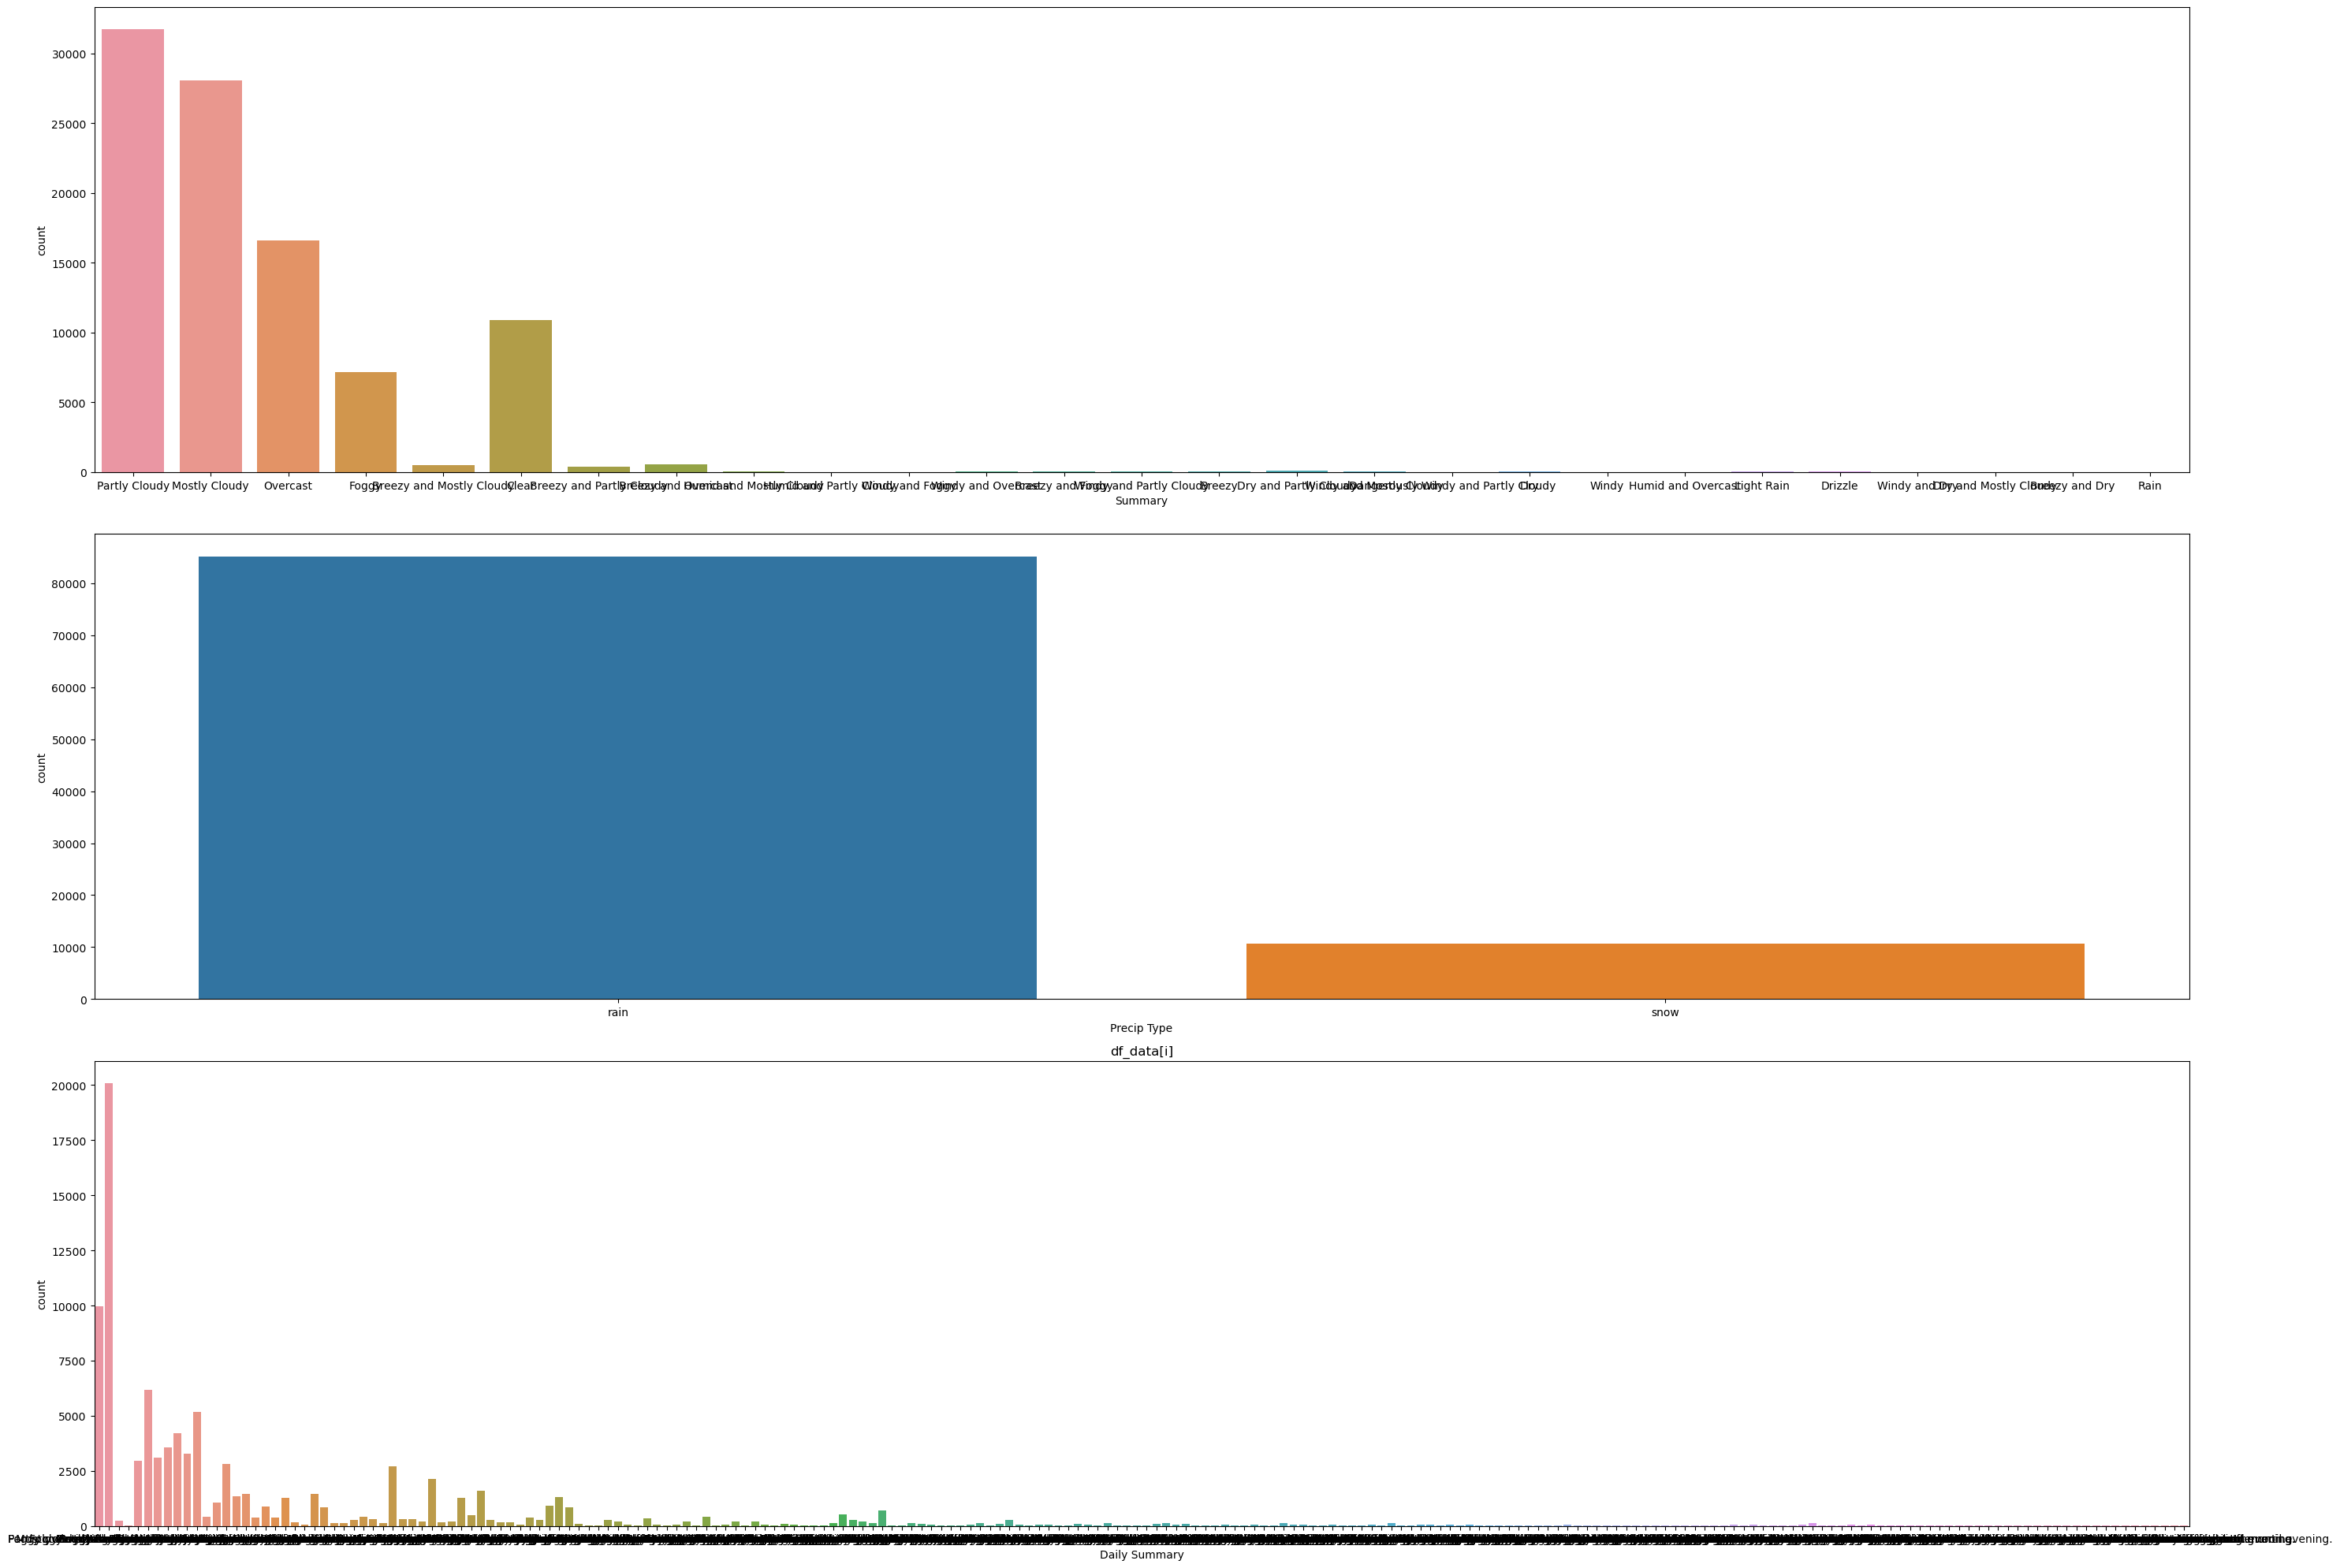

In [19]:
#EDA
#Univariate Analysis for Categorical
fig,ax = plt.subplots(3,1,figsize = (30,20))

for i , subplot in zip(cat,ax.flatten()):
    sns.countplot(x = df_data[i],ax =subplot)
    plt.title('df_data[i]')
    
plt.tight_layout()
plt.show()

In [20]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Time,Month,Day,Year
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,22,3,31,2006
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,23,3,31,2006
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,0,4,1,2006
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,1,4,1,2006
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2,4,1,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,17,9,9,2016
96449,2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,18,9,9,2016
96450,2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,19,9,9,2016
96451,2016-09-09 20:00:00+00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,20,9,9,2016


In [21]:
date = ['Time','Month','Year','Day']

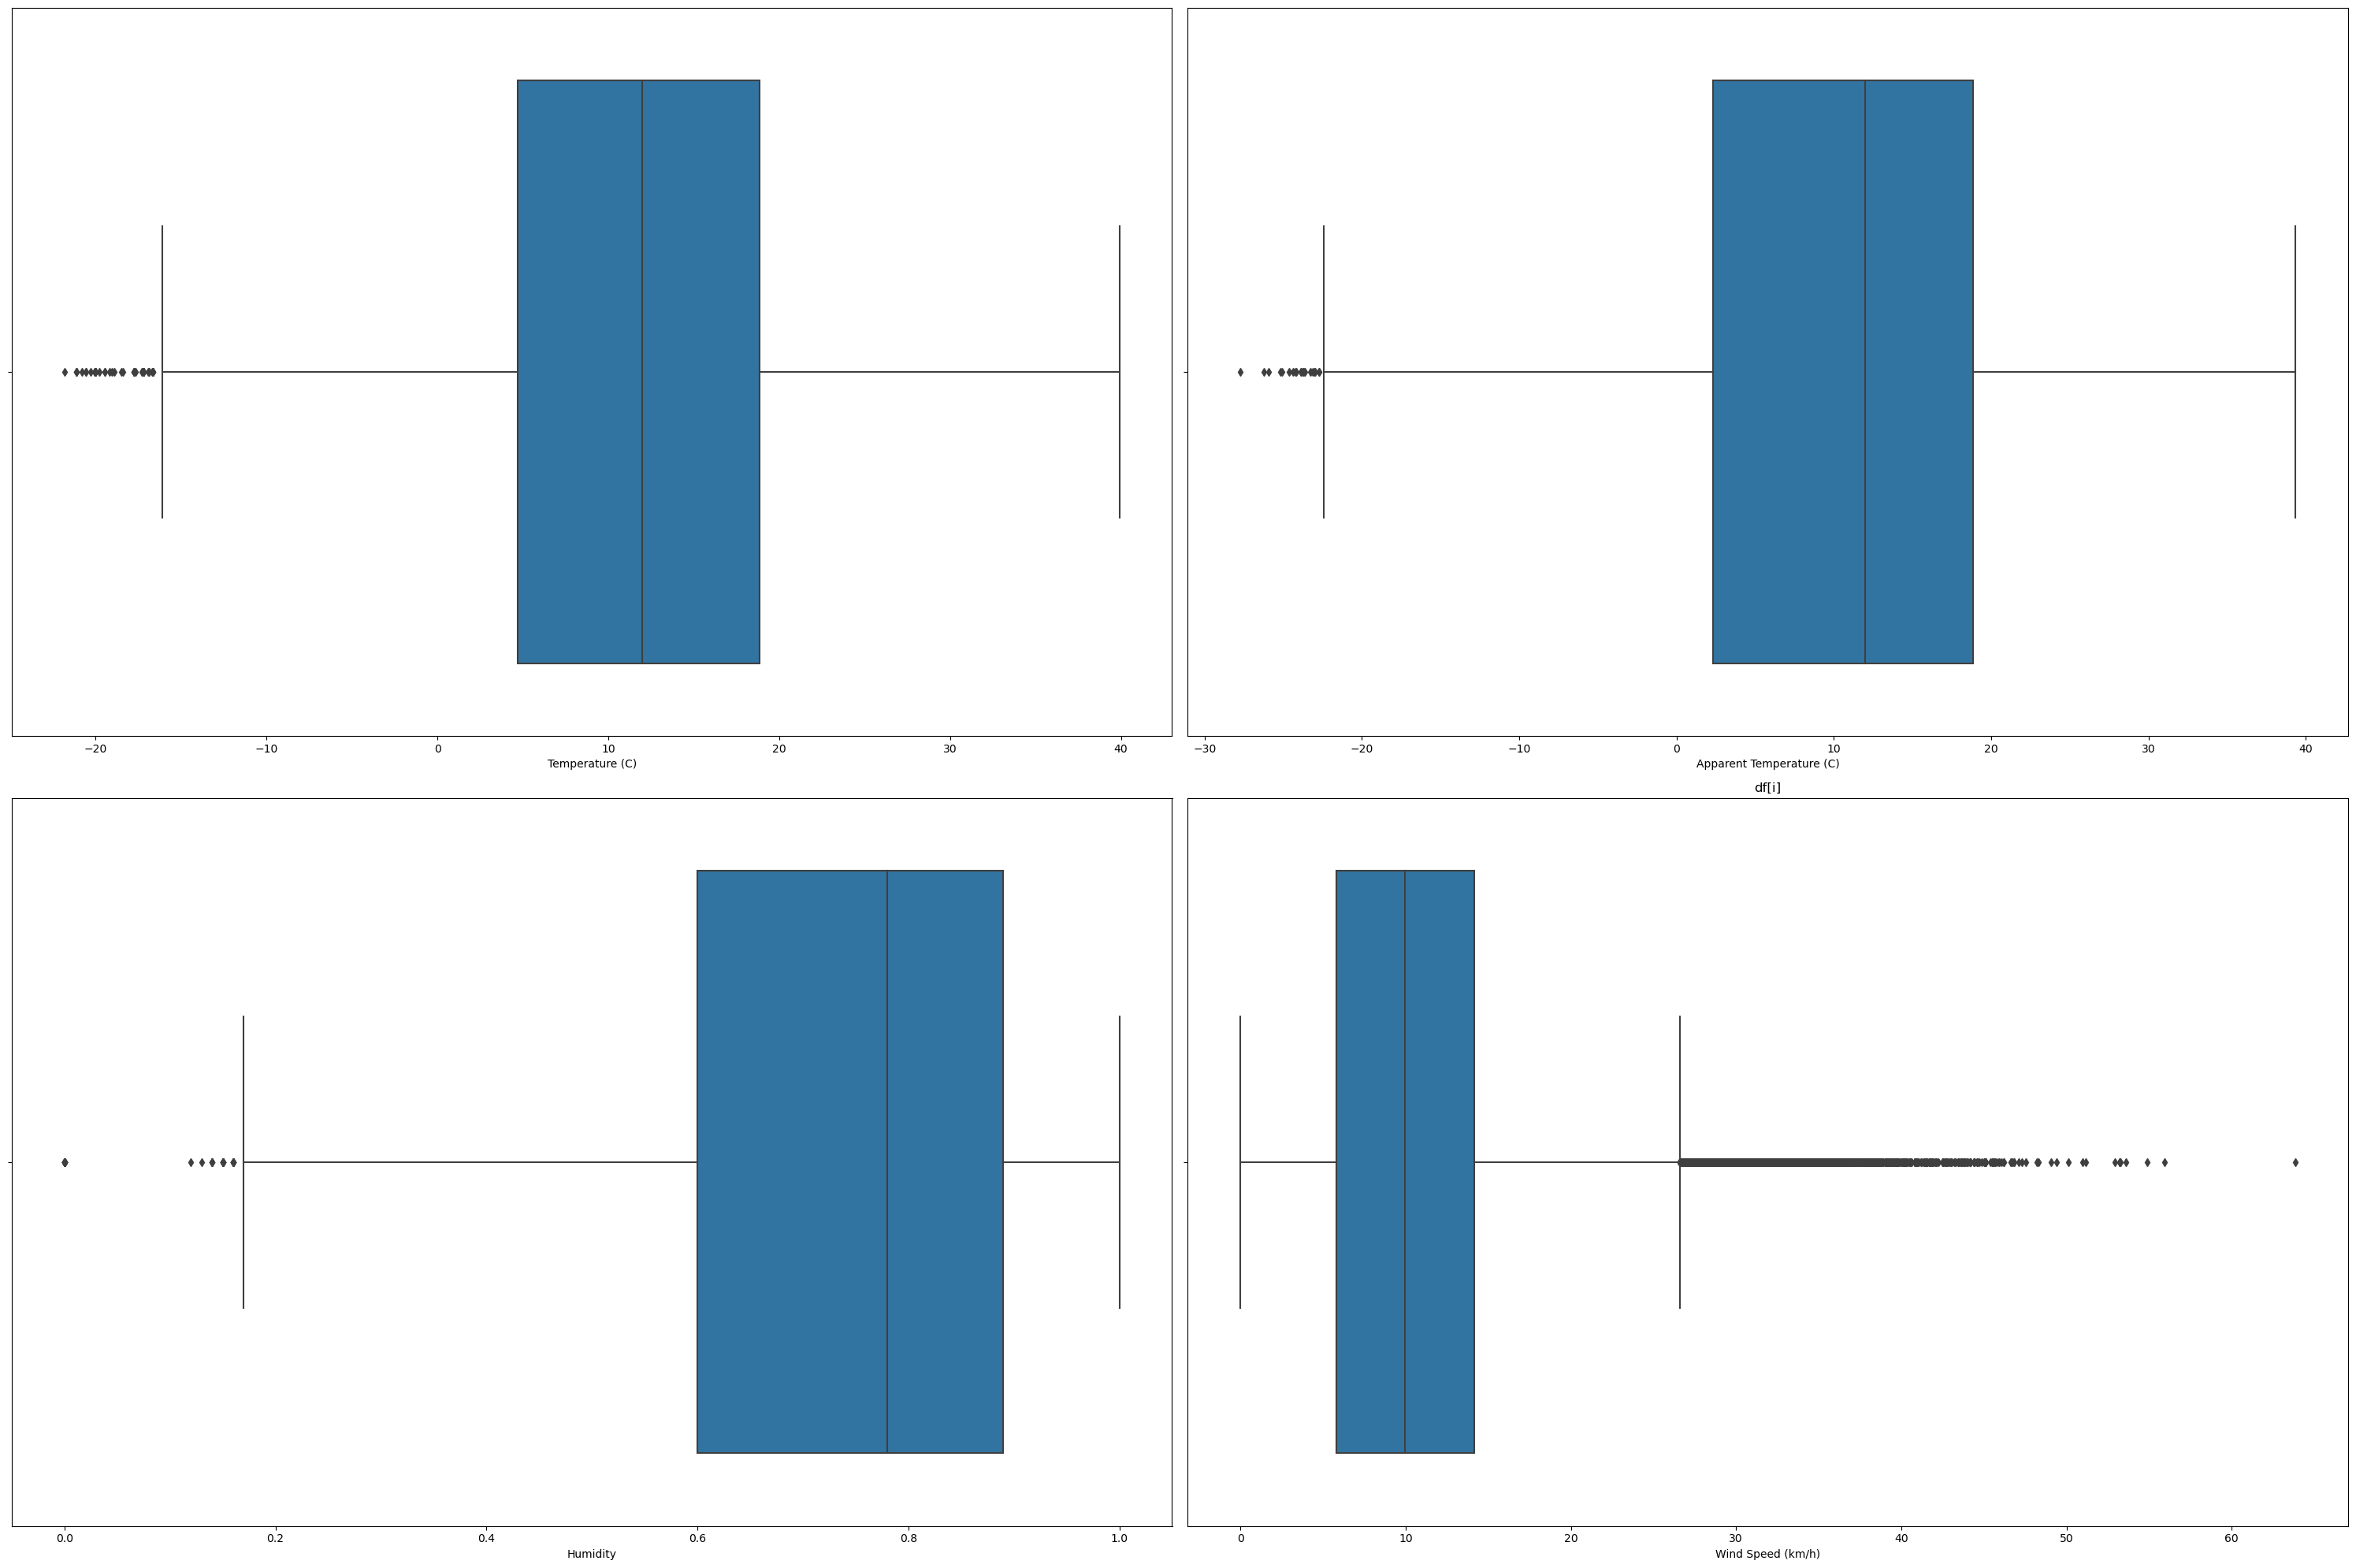

In [22]:
#EDA
#Univariate Analysis for Numerical
fig,ax = plt.subplots(2,2,figsize = (30,20))

for i , subplot in zip(num,ax.flatten()):
    sns.boxplot(x= df[i],ax =subplot)
    plt.title('df[i]')
    
plt.tight_layout()
plt.show()

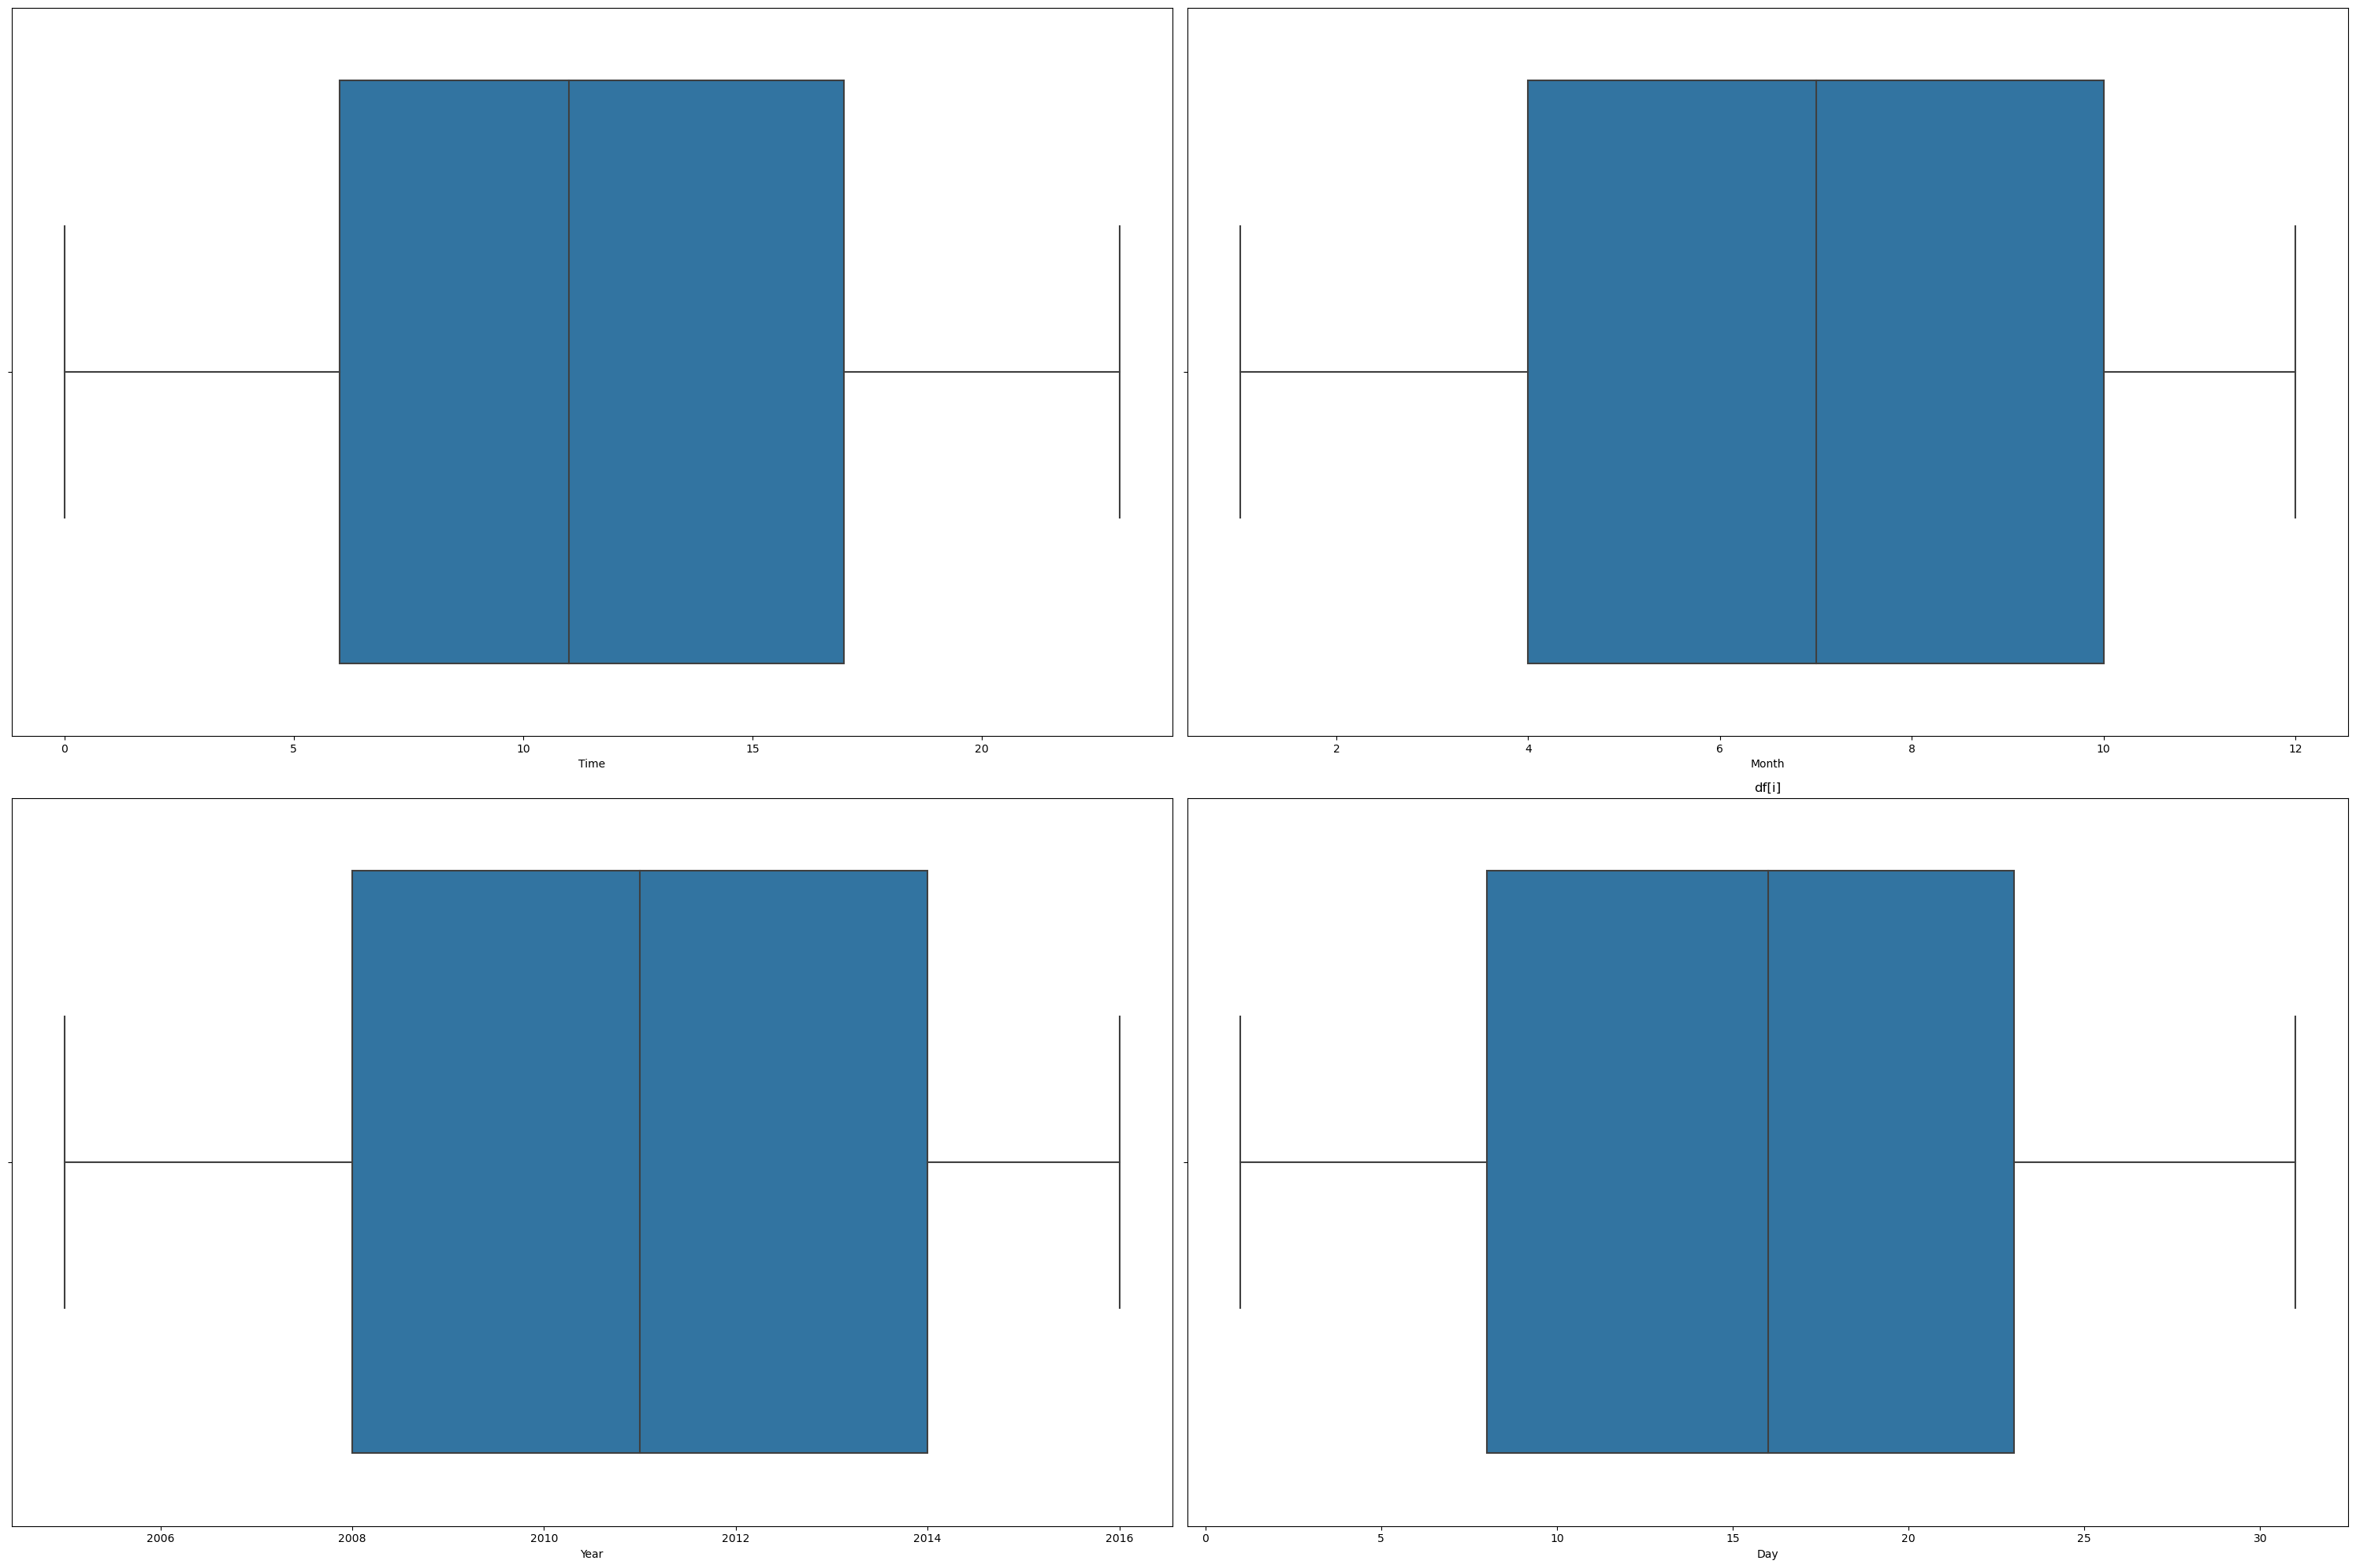

In [23]:
#EDA
#Univariate Analysis for Numerical
fig,ax = plt.subplots(2,2,figsize = (30,20))

for i , subplot in zip(date,ax.flatten()):
    sns.boxplot(x= df[i],ax =subplot)
    plt.title('df[i]')
    
plt.tight_layout()
plt.show()

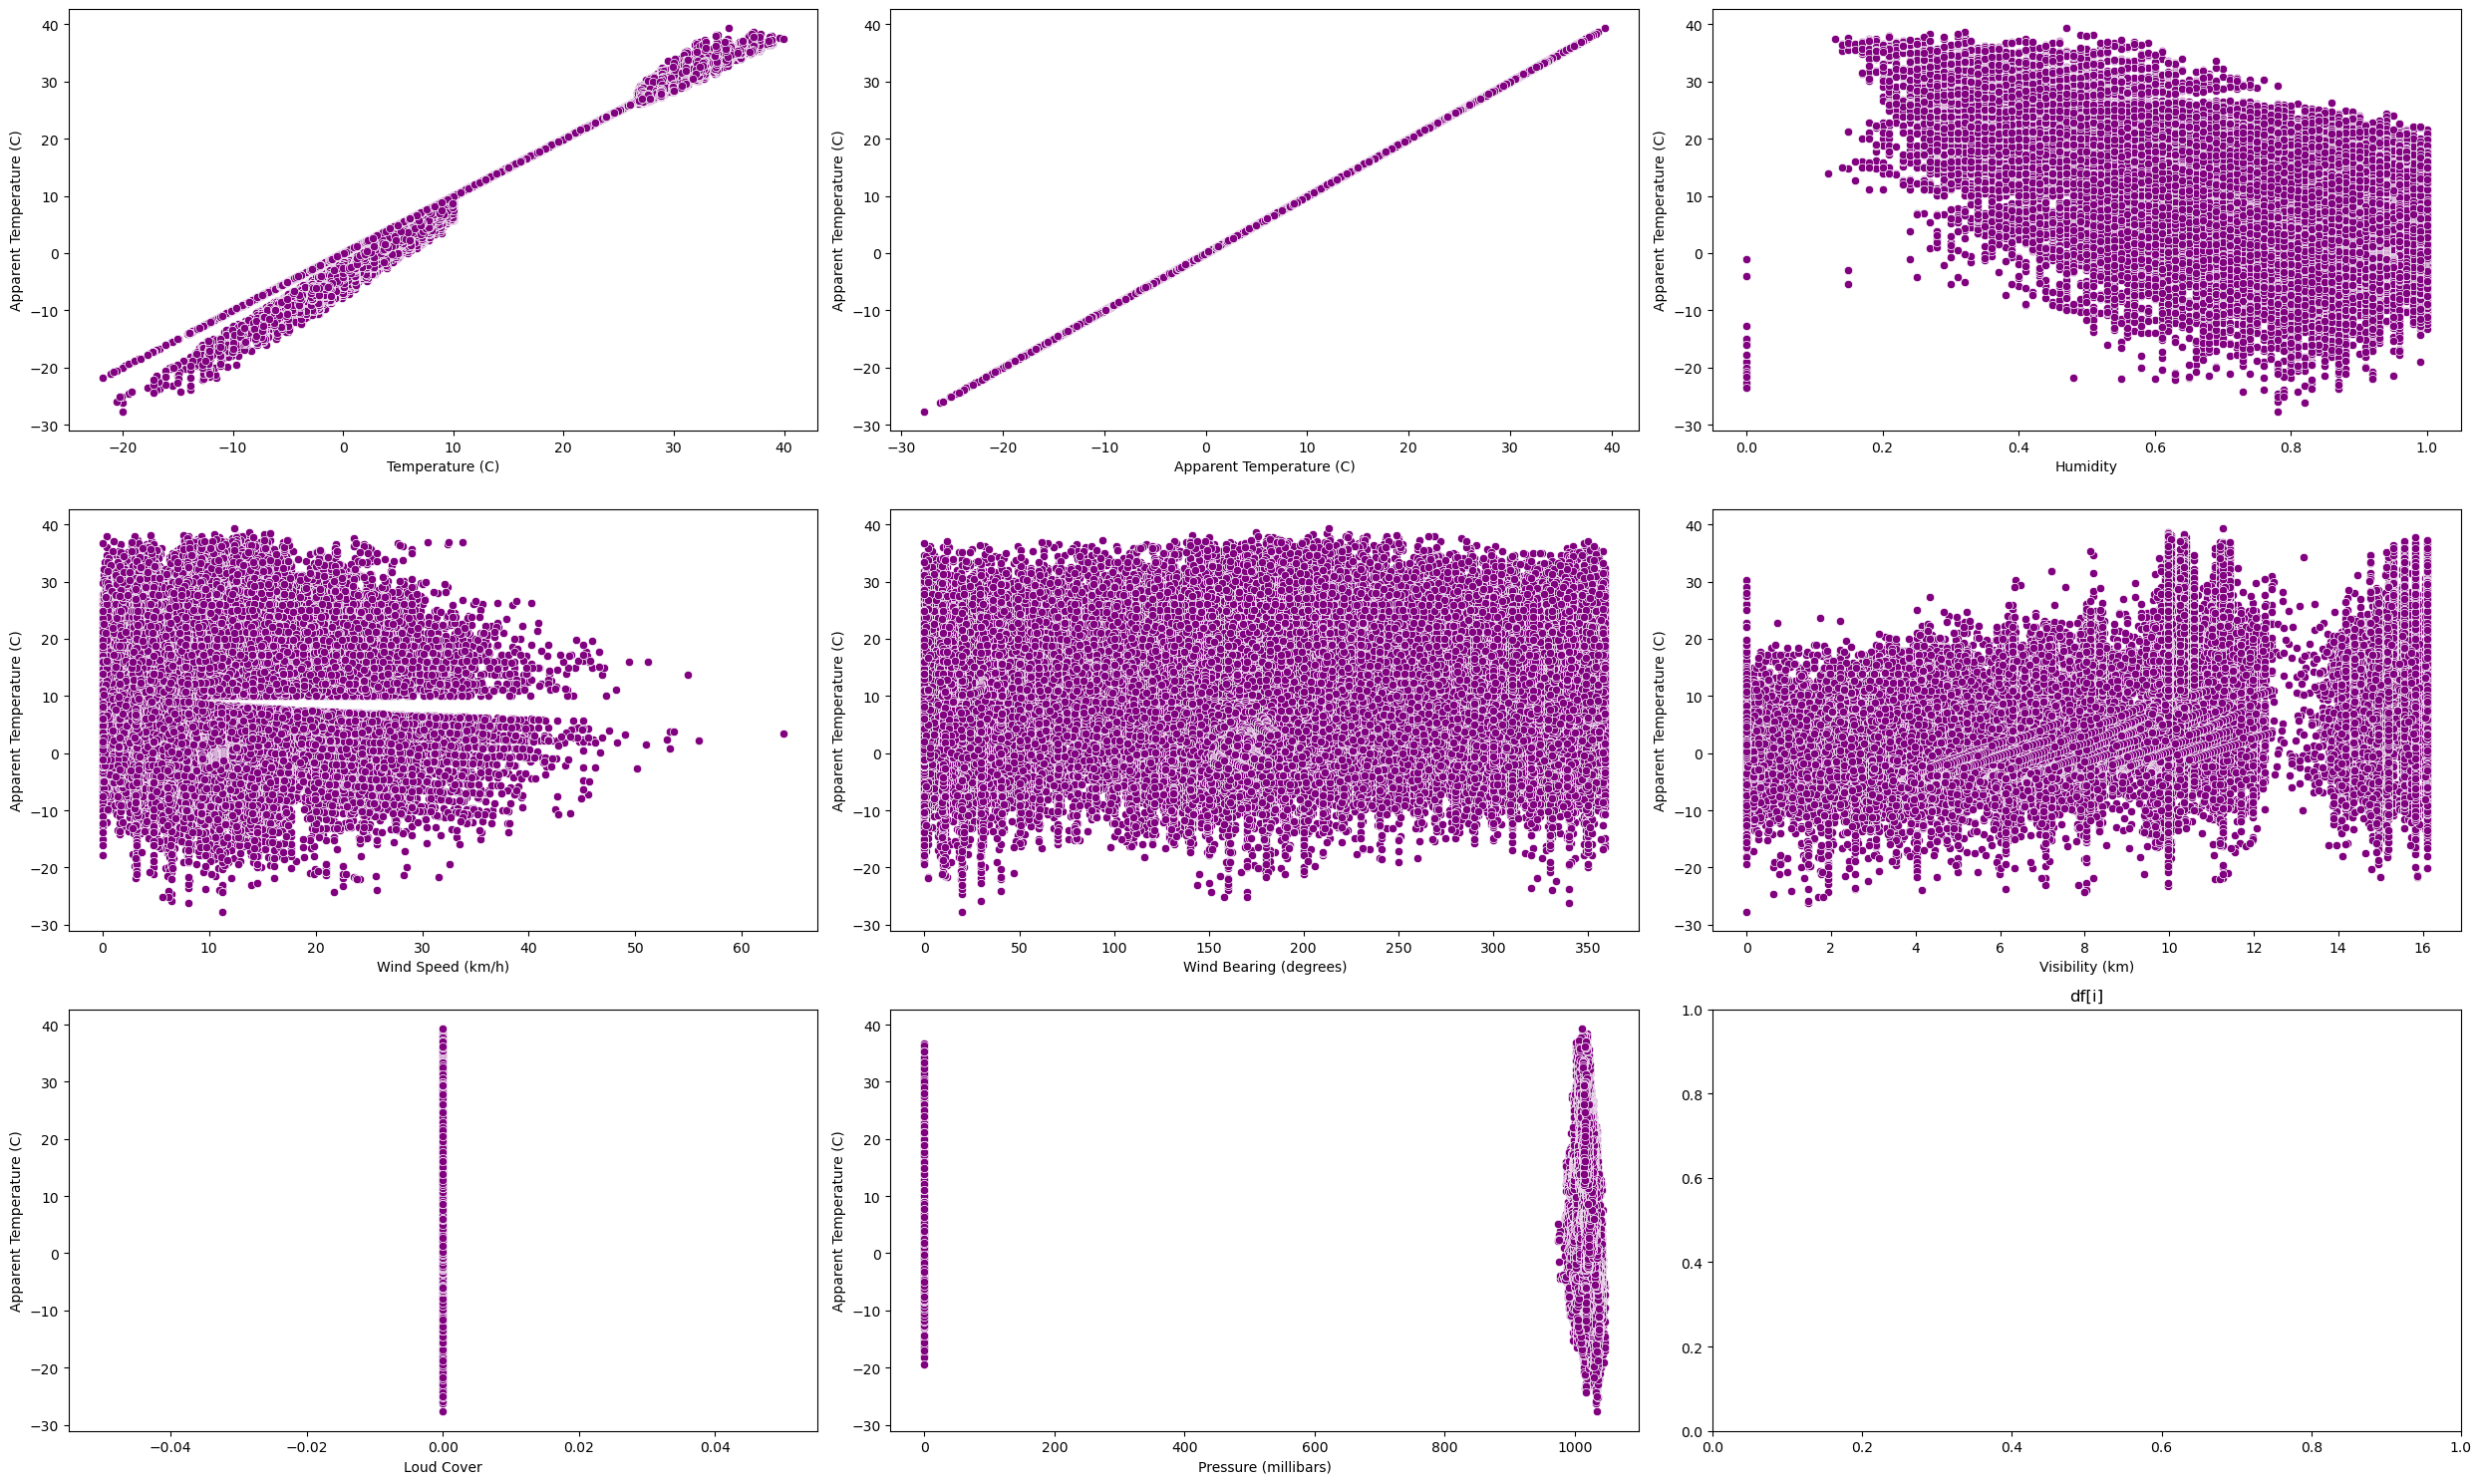

In [24]:
#Multivariate Analysis
fig,ax = plt.subplots(3,3,figsize = (25,15))

for i , subplot in zip(num,ax.flatten()):
    sns.scatterplot(x = df[i],y= df['Apparent Temperature (C)'],ax =subplot,color = 'purple')
    plt.title('df[i]')
    
plt.tight_layout()
plt.show()

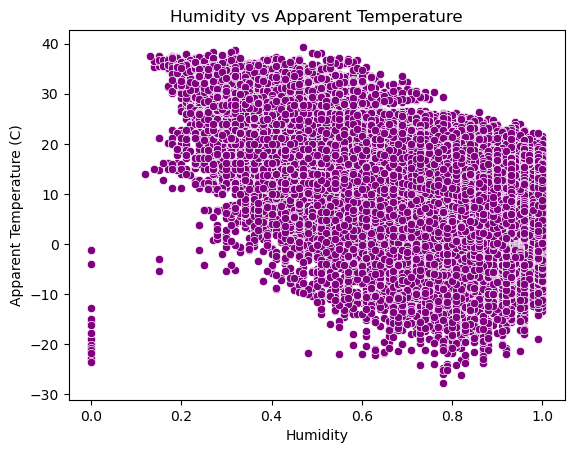

In [25]:
# Apparent Temperature vs Humidity
sns.scatterplot(x = df['Humidity'],y= df['Apparent Temperature (C)'],color = 'purple')
plt.title('Humidity vs Apparent Temperature')
    
plt.show()

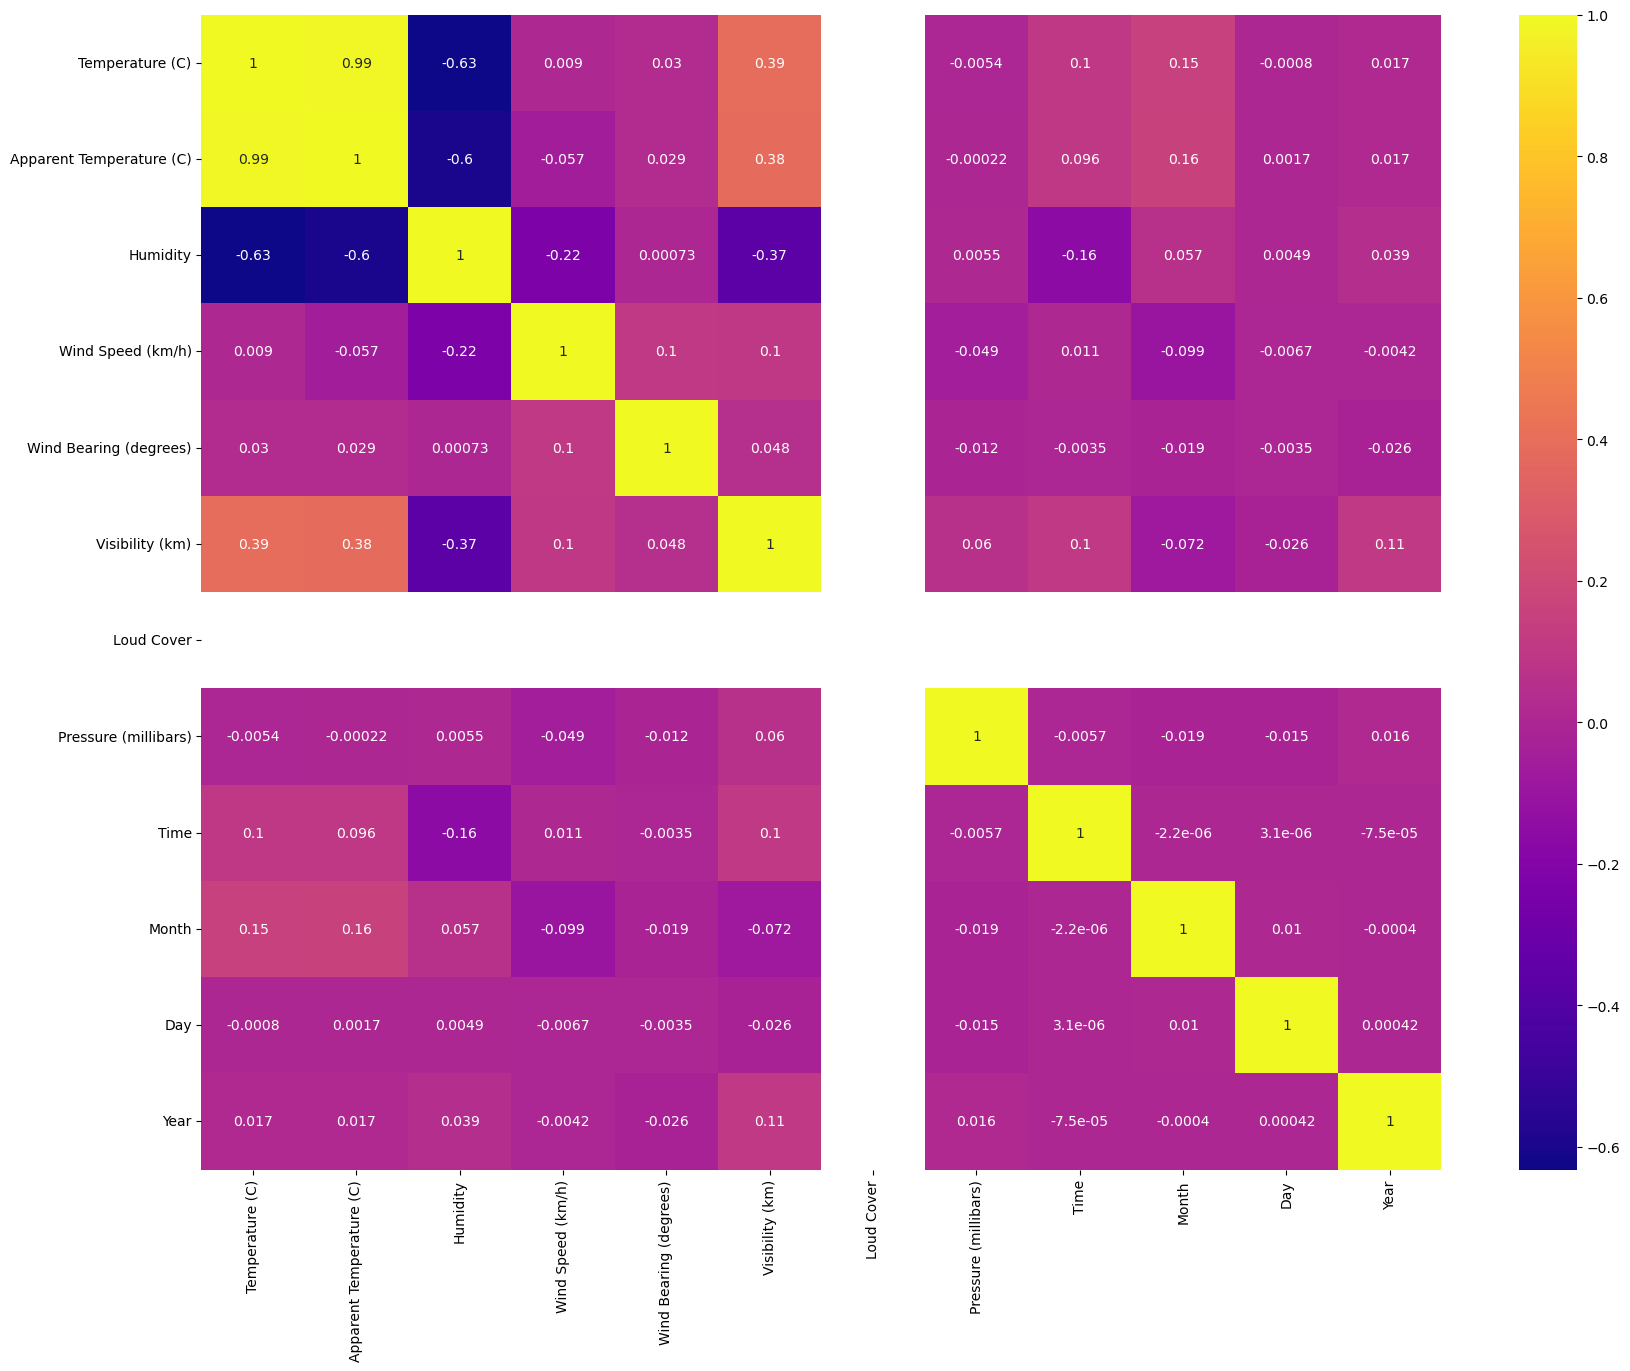

In [26]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),annot = True,cmap ='plasma')
plt.show()

In [27]:
df['Precip Type']

0        rain
1        rain
2        rain
3        rain
4        rain
         ... 
96448    rain
96449    rain
96450    rain
96451    rain
96452    rain
Name: Precip Type, Length: 96453, dtype: object

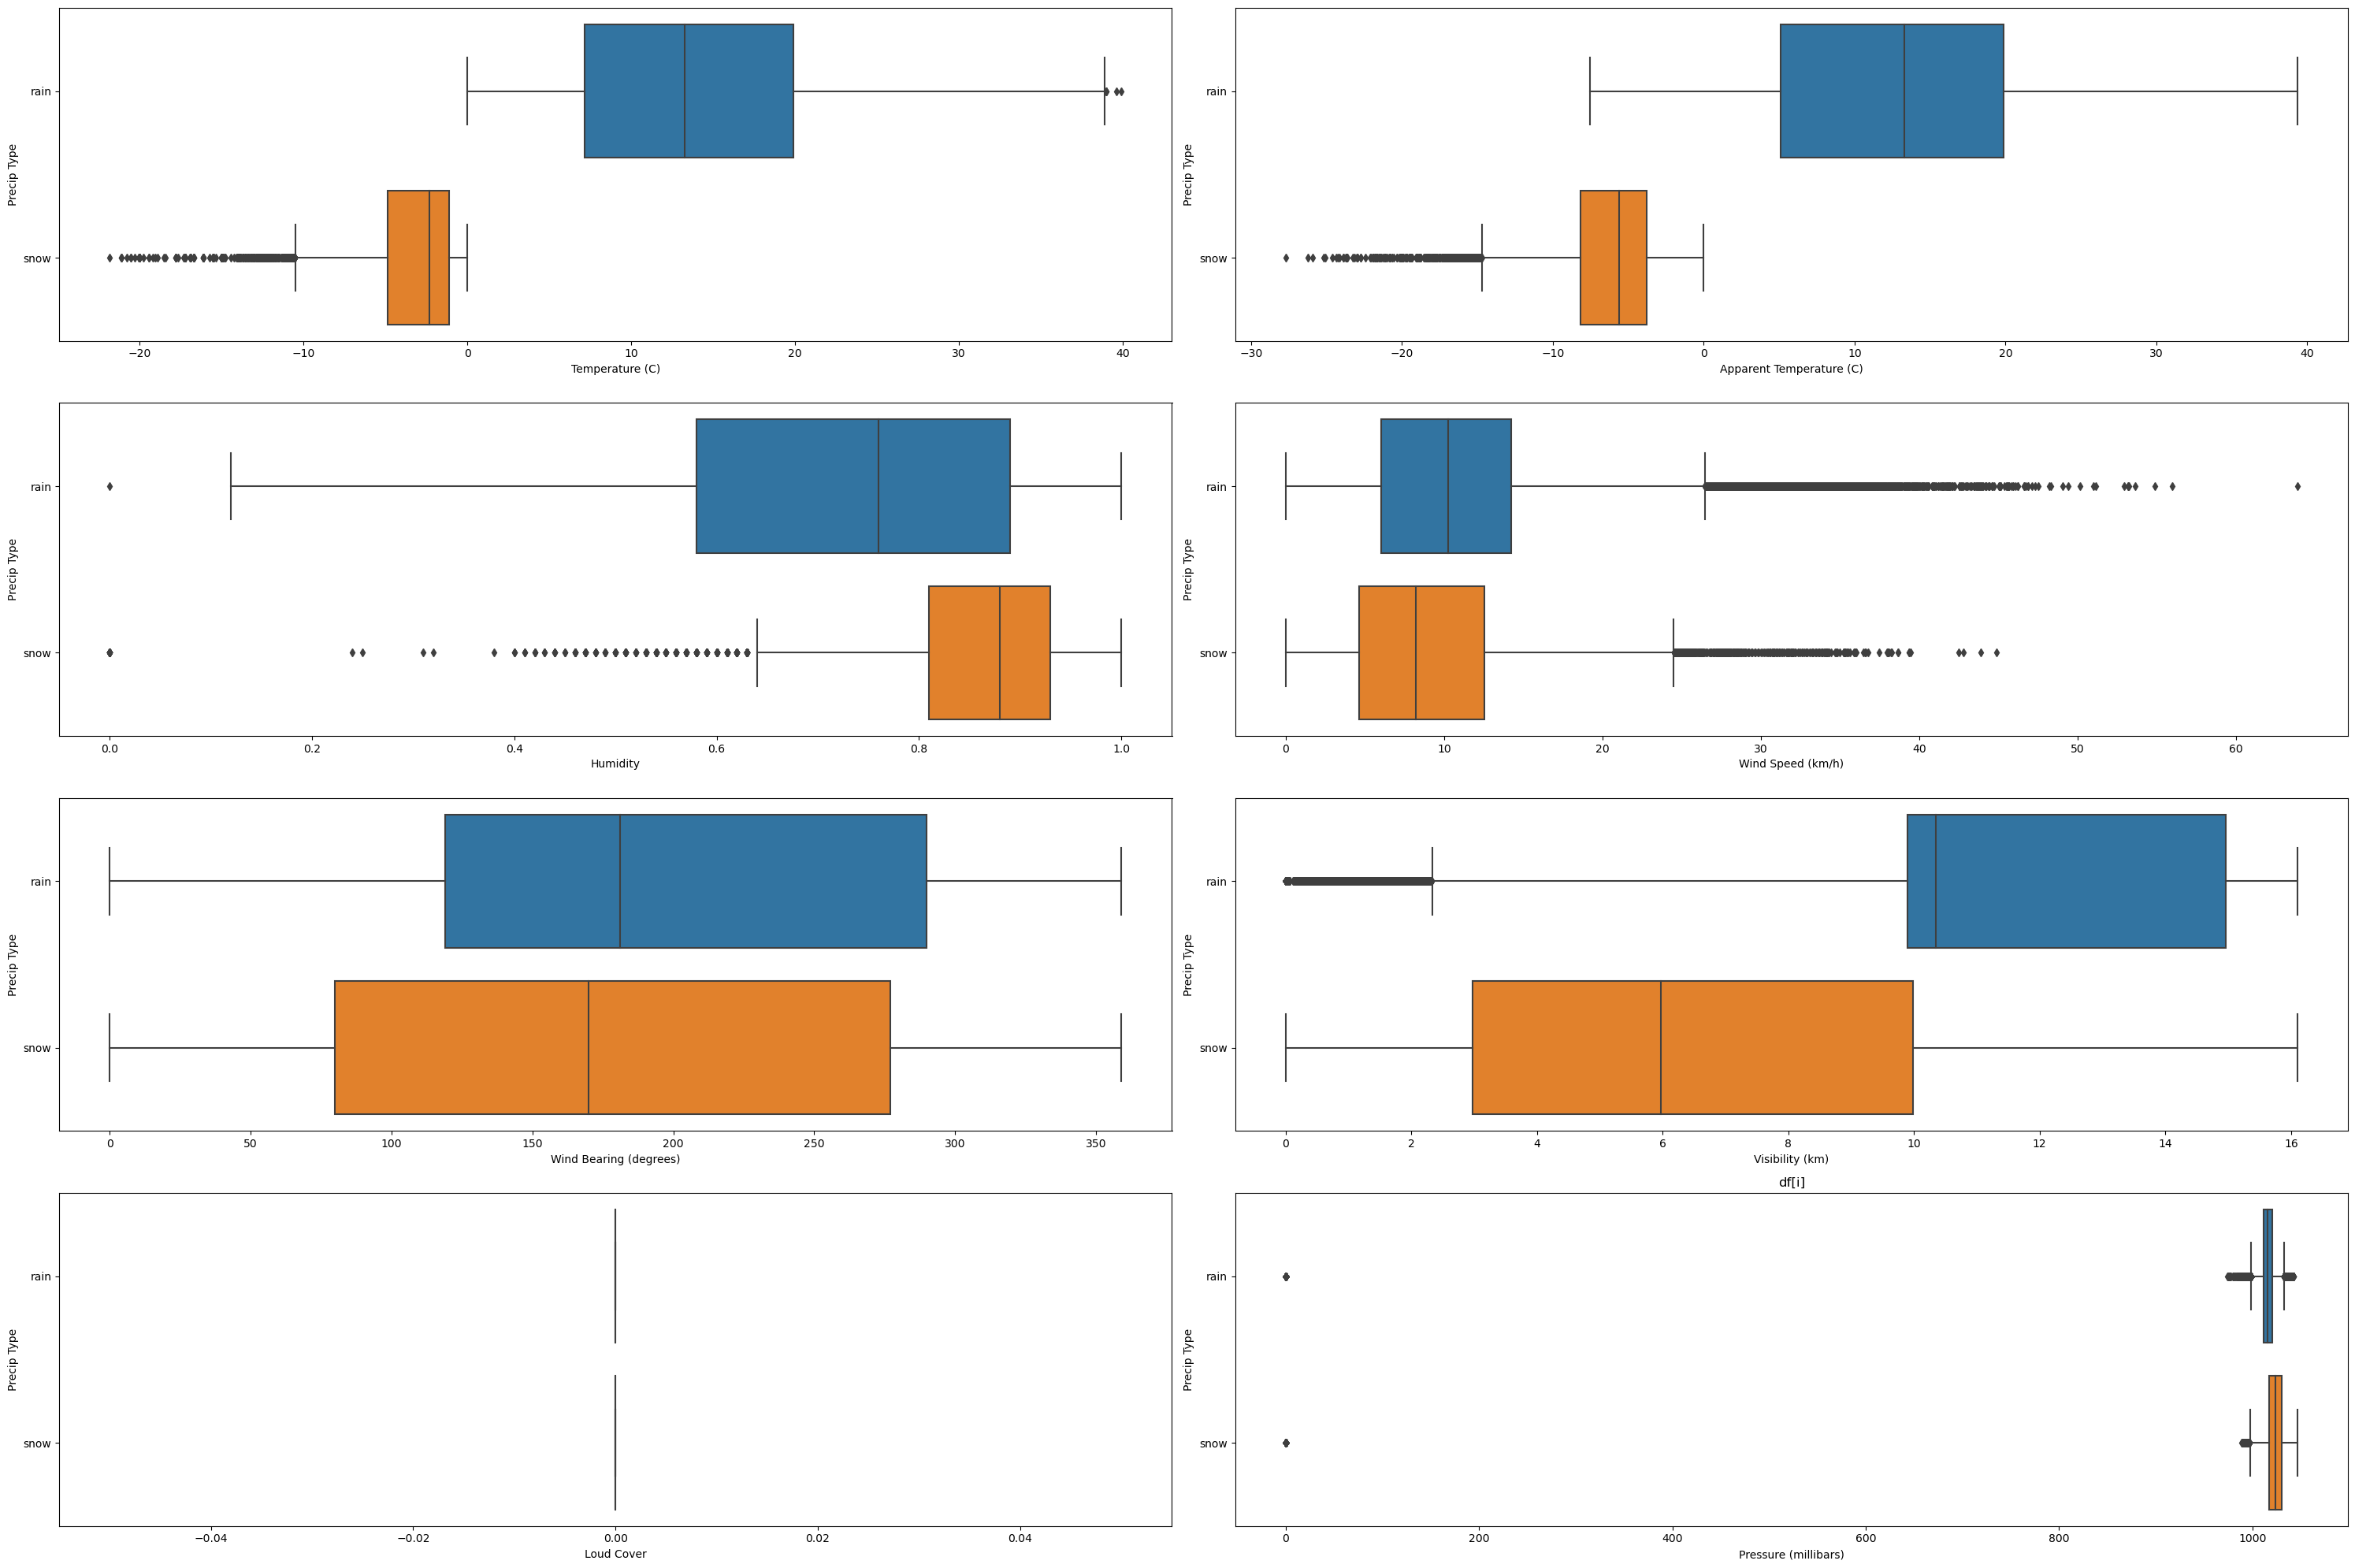

In [28]:
#EDA
#Multivariate Analysis for Numerical vs Cat(Missing values feature)
fig,ax = plt.subplots(4,2,figsize = (30,20))

for i , subplot in zip(num,ax.flatten()):
    sns.boxplot(x= df[i], y = df['Precip Type'],ax =subplot)
    plt.title('df[i]')
    
plt.tight_layout()
plt.show()

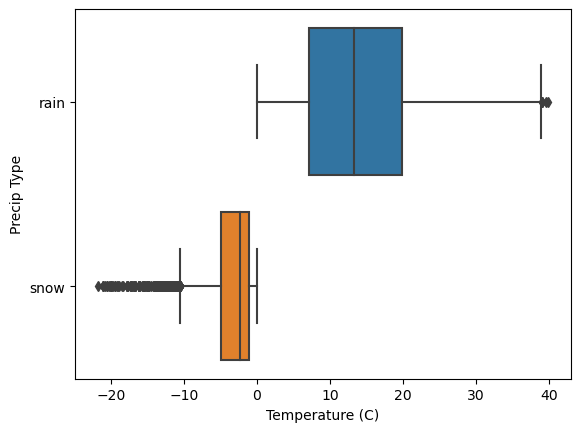

In [29]:
sns.boxplot(x= df['Temperature (C)'], y = df['Precip Type'])
plt.show()

In [30]:
df[df['Precip Type'] =='snow']['Temperature (C)'].max()

0.0

In [31]:
df[df['Precip Type'] =='rain']['Temperature (C)'].min()

0.0055555555555544

In [32]:
df.rename(columns = {'Apparent Temperature (C)':'Apparent_Temperature(C)'}, inplace = True)

In [33]:
#UnivariantLinear Regression
X = df['Humidity']
y = df['Apparent_Temperature(C)']

In [34]:
#This split should always be in the sequence of xtrain,xtest, ytrain and ytest

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,y,
                                             test_size = 0.30,
                                             random_state = 42)

In [35]:
import statsmodels.formula.api as sma

model_rd = sma.ols(' X ~ y ',data=df).fit()
summary = model_rd.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      X   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                 5.499e+04
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:49:41   Log-Likelihood:                 42340.
No. Observations:               96453   AIC:                        -8.468e+04
Df Residuals:                   96451   BIC:                        -8.466e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8544      0.001   1193.930      0.0

In [36]:
import statsmodels.api as sm
tstat,pval = sm.stats.linear_rainbow(model_rd)
tstat,pval

(0.915274541945825, 0.9999999999999999)

In [37]:
if pval  < 0.05 :
    print('Reject H0')
    print('The relationship between dependent and independent variable is linear')
else:
    print('Failed to reject H0')
    print('The relationship between dependent and independent variable is not linear')

Failed to reject H0
The relationship between dependent and independent variable is not linear


In [38]:
#H0: Data is normally distributed
#HA: Data is not normally distributed
import scipy.stats as stats
stat,p_val = stats.jarque_bera(model_rd.resid)
stat,p_val

(2375.3640202626493, 0.0)

In [39]:
if p_val < 0.05:
    print('Reject H0')
    print('HA: Data is not normally distributed')
else:
    print('Failed to reject H0')
    print('Data is normally distributed')

Reject H0
HA: Data is not normally distributed


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [41]:
import statsmodels.api as sma
t_train = sma.add_constant(xtrain)
t_train

,const,Humidity
37406,1.0,0.75
90423,1.0,1.00
34192,1.0,0.66
69125,1.0,0.93
65412,1.0,0.43
...,...,...
6265,1.0,0.84
54886,1.0,0.85
76820,1.0,0.81
860,1.0,0.82


In [42]:
t_test = sma.add_constant(xtest)
t_test

,const,Humidity
87206,1.0,0.53
33421,1.0,0.83
6807,1.0,0.65
37340,1.0,0.85
3016,1.0,0.82
...,...,...
23912,1.0,0.47
64267,1.0,0.99
49886,1.0,0.59
67571,1.0,0.96


In [43]:
model=sma.OLS(ytrain,t_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Apparent_Temperature(C)   R-squared:                       0.367
Model:                                 OLS   Adj. R-squared:                  0.367
Method:                      Least Squares   F-statistic:                 3.914e+04
Date:                     Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                             19:49:42   Log-Likelihood:            -2.4035e+05
No. Observations:                    67517   AIC:                         4.807e+05
Df Residuals:                        67515   BIC:                         4.807e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.2077      0.127    276.803      0.000      34.958      35.457
Humidity     -33.1158      0.167   -197.835      0.000     -33.444     -32.788
==============================================================================
Omnibus:                     2265.503   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2498.704
Skew:                          -0.467   Prob(JB):                         0.00
Kurtosis:                       3.132   Cond. No.                         7.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Assumption of Linear Regression
1. Linearity - Rainbow Test.
2. Normality - Jarque Bera Test, Residual Plot, Probplot
3. Multicollinearity
4. Heteroscedasticity
5. Autocorrelation of Errors

### Test of Linearity - Rainbow Test
H0: Data has Linear relationship with the Target.

Ha: Data has no linear relationship with the Target.

In [44]:
#H0: Model is linear
#HA: Model doesnt exhibit linearity
sma.stats.linear_rainbow(model)

(1.0022339773554956, 0.41878757706297814)

### Test of Normality - Jarque Bera Test
H0: Data/Residual are Normally distributed.

Ha: Data/Residuals are not Normally distributed.

In [45]:
stats.jarque_bera(model.resid)

Jarque_beraResult(statistic=2498.7036828016257, pvalue=0.0)

In [46]:
#p-value may not be accurate for N > 5000.
stats.shapiro(model.resid)

C:\Users\Selva Jenner\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9828247427940369, pvalue=0.0)

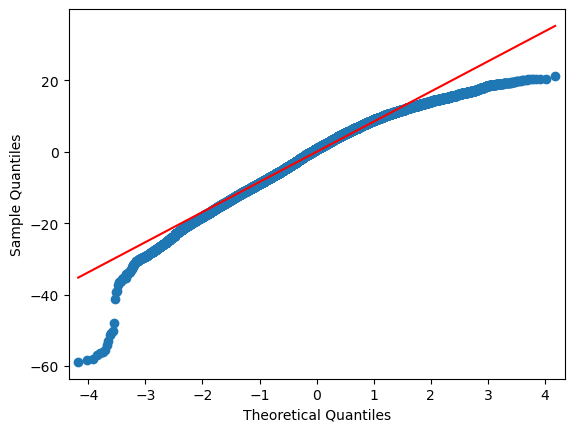

In [47]:
sma.qqplot(model.resid,line ='r')
plt.show()

### Test of Multicollinearity
1. Multicollinearity refers to the predictor variables being highly correlated among the themselves.
2. Most of the time, all the highly correlated predictors will have more or less the same impact on the model.
3. Since they have more or less the same impact, it may not be right to keep all the variables to predict the target.
4. If there are 2 or more predictors having multicollinearity, then one of the variables can be  dropped.

Working of VIF
------------------------
	1. It never includes your target. Because, we want all the predictors to have good relationship with the target. We are only referring to X and not Y.
	2. Each variable will be considered as Target with the rest of the predictors as independent variables.
	3. This keeps happening till all the features are exhausted.
	4. R2 is calculated for each of the variable. This R2 is not of the Model.
	5. Value is replaced in VIF formula and calculated.
	6. VIF is calculated in the form of the table.
	7. VIF > 10 is considered to be highly correlated. Between 5-10-Moderate muticollinearity. Between 1-5 hardly collinear.
	8. Consider only the training data- xtrain and not target -y.

Difference Between Condition No: and VIF
-----------------------------------------------------------
	1. VIF tells which features are highly correlated vs the rest.  Condition No: Will tell about the whole model. VIF will tell about each and every column.
	2. VIF tells about each and every feature.  VIF = 1/1-R2

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
vif_list = []
for i in range(t_train.shape[1]):
    vif_list.append(variance_inflation_factor(t_train.values,i))
pd.DataFrame({'Features':t_train.columns,'VIF':vif_list}).sort_values(by='VIF',ascending= False)

,Features,VIF
0,const,15.094486
1,Humidity,1.000000


In [50]:
#VIF  = 1 No multicollinearity

In [51]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model.resid)

1.9917783605754766

1. Durbin Watson should be between 1.5 to 2.5.
2. There is no presence of Auto correlation of errors.

### Heteroscedasticity Test

If a plot is created between fitted values and residuals, it will gives us the presence of Hetroscedasticity or not.

It is a plot between fitted value and model residuals.

In [52]:
import statsmodels.stats.api as sms

# Breusch-Pagan test
bp_test = sms.het_breuschpagan(model.resid, t_train)
print("Breusch-Pagan Test Statistics:", bp_test[0])
print("Breusch-Pagan Test p-value:", bp_test[1])


Breusch-Pagan Test Statistics: 20.16596928376198
Breusch-Pagan Test p-value: 7.1004965900196196e-06


BreuschPagan Test

H0: There is equal variance present in the data

Ha: There is unequal variance in the data.

In [53]:
if bp_test[1] < 0.05 :
    print('Reject H0')
    print('HA: There is Heteroscedacity')
else:
    print('Failed to reject H0')
    print('H0: There is Homoscedacity')

Reject H0
HA: There is Heteroscedacity


### All the assumptions are not met.

In [54]:
model=sma.WLS(ytrain,t_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               WLS Regression Results                              
===================================================================================
Dep. Variable:     Apparent_Temperature(C)   R-squared:                       0.367
Model:                                 WLS   Adj. R-squared:                  0.367
Method:                      Least Squares   F-statistic:                 3.914e+04
Date:                     Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                             19:49:43   Log-Likelihood:            -2.4035e+05
No. Observations:                    67517   AIC:                         4.807e+05
Df Residuals:                        67515   BIC:                         4.807e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.2077      0.127    276.803      0.000      34.958      35.457
Humidity     -33.1158      0.167   -197.835      0.000     -33.444     -32.788
==============================================================================
Omnibus:                     2265.503   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2498.704
Skew:                          -0.467   Prob(JB):                         0.00
Kurtosis:                       3.132   Cond. No.                         7.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
X = df['Humidity']
y = df['Apparent_Temperature(C)']

In [56]:
#This split should always be in the sequence of xtrain,xtest, ytrain and ytest

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,y,
                                             test_size = 0.30,
                                             random_state = 42)

In [57]:
xtest = xtest.to_frame()

xtrain = xtrain.to_frame()

In [58]:
column = ['Humidity']

In [59]:
import numpy, warnings
numpy.warnings = warnings
from sklearn.preprocessing import PowerTransformer
pt =PowerTransformer()
for i in column:
    x_train_tra = pt.fit(xtrain[[i]])
    xtrain = x_train_tra.transform(xtrain[[i]])
    xtest = x_train_tra.transform(xtest[[i]])

In [60]:
modelt =sma.OLS(ytrain,sma.add_constant(xtrain)).fit()
modelt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Apparent_Temperature(C)   R-squared:                       0.344
Model:                                 OLS   Adj. R-squared:                  0.344
Method:                      Least Squares   F-statistic:                 3.547e+04
Date:                     Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                             19:49:44   Log-Likelihood:            -2.4153e+05
No. Observations:                    67517   AIC:                         4.831e+05
Df Residuals:                        67515   BIC:                         4.831e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.8921      0.033    326.932      0.000      10.827      10.957
x1            -6.2748      0.033   -188.342      0.000      -6.340      -6.210
==============================================================================
Omnibus:                     2327.893   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2578.148
Skew:                          -0.479   Prob(JB):                         0.00
Kurtosis:                       2.997   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,y,
                                             test_size = 0.30,
                                             random_state = 42)

In [62]:
xtest = xtest.to_frame()

xtrain = xtrain.to_frame()

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
dt = DecisionTreeRegressor()
modeldt = dt.fit(xtrain,ytrain)
ypred_train = modeldt.predict(xtrain)
r2_score(ytrain,ypred_train)

0.41078056554190623

In [64]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(xtrain, ytrain)
rf_pred = rf_model.predict(xtest)
rf_r2 = r2_score(ytest, rf_pred)
print("Random Forest R2 Score:", rf_r2)

# AdaBoost
ada_model = AdaBoostRegressor()
ada_model.fit(xtrain, ytrain)
ada_pred = ada_model.predict(xtest)
ada_r2 = r2_score(ytest, ada_pred)
print("AdaBoost R2 Score:", ada_r2)

# XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(xtrain, ytrain)
xgb_pred = xgb_model.predict(xtest)
xgb_r2 = r2_score(ytest, xgb_pred)
print("XGBoost R2 Score:", xgb_r2)

Random Forest R2 Score: 0.40123119315400424
AdaBoost R2 Score: 0.3103537345629972
XGBoost R2 Score: 0.40127672980290297


In [65]:
#UnivariantLinear Regression
X = df['Humidity']
y = df['Temperature (C)']

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,y,
                                             test_size = 0.30,
                                             random_state = 42)

In [66]:
model=sma.OLS(ytrain,sma.add_constant(xtrain)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                 4.564e+04
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:49:50   Log-Likelihood:            -2.3074e+05
No. Observations:               67517   AIC:                         4.615e+05
Df Residuals:                   67515   BIC:                         4.615e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.7374      0.110    314.877      0.000      34.521      34.954
Humidity     -31.0155      0.145   -213.627      0.000     -31.300     -30.731
==============================================================================
Omnibus:                     1608.866   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1725.615
Skew:                          -0.387   Prob(JB):                         0.00
Kurtosis:                       3.118   Cond. No.                         7.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
pred_train = model.predict(sma.add_constant(xtrain))  # the machine gets trained on train data and then predict on training data
pred_test = model.predict(sma.add_constant(xtest))    # the machine gets trained on train data and then predict on testing data

# rmse  (actual,predicted)

rmse_train = np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test =  np.sqrt(mean_squared_error(ytest ,pred_test))

print("RMSE Train: ", rmse_train)
print("RMSE Test:  ", rmse_test)

RMSE Train:  7.378151032706722
RMSE Test:   7.451295480066621


In [68]:
#H0: Model is linear
#HA: Model doesnt exhibit linearity
sma.stats.linear_rainbow(model)

(0.9995683244713973, 0.5158198030682569)

In [69]:
stats.jarque_bera(model.resid)

Jarque_beraResult(statistic=1725.6151745702582, pvalue=0.0)

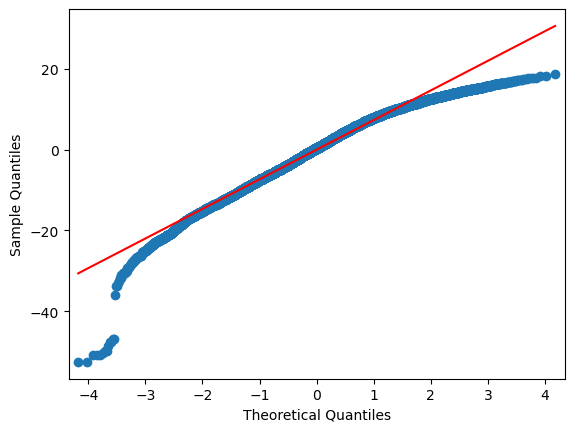

In [70]:
sma.qqplot(model.resid,line ='r')
plt.show()

In [71]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model.resid)

1.9925389465085437

In [72]:
import statsmodels.stats.api as sms

# Breusch-Pagan test
bp_test = sms.het_breuschpagan(model.resid, t_train)
print("Breusch-Pagan Test Statistics:", bp_test[0])
print("Breusch-Pagan Test p-value:", bp_test[1])


Breusch-Pagan Test Statistics: 18.916509403764305
Breusch-Pagan Test p-value: 1.3656569304813758e-05


In [73]:
if bp_test[1] < 0.05 :
    print('Reject H0')
    print('HA: There is Heteroscedacity')
else:
    print('Failed to reject H0')
    print('H0: There is no Heteroscedacity')

Reject H0
HA: There is Heteroscedacity


In [74]:
xtest = xtest.to_frame()

xtrain = xtrain.to_frame()

In [75]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(xtrain, ytrain)
rf_pred = rf_model.predict(xtest)
rf_r2 = r2_score(ytest, rf_pred)
print("Random Forest R2 Score:", rf_r2)

# AdaBoost
ada_model = AdaBoostRegressor()
ada_model.fit(xtrain, ytrain)
ada_pred = ada_model.predict(xtest)
ada_r2 = r2_score(ytest, ada_pred)
print("AdaBoost R2 Score:", ada_r2)

# XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(xtrain, ytrain)
xgb_pred = xgb_model.predict(xtest)
xgb_r2 = r2_score(ytest, xgb_pred)
print("XGBoost R2 Score:", xgb_r2)

Random Forest R2 Score: 0.4361084662561231
AdaBoost R2 Score: 0.38307339217647984
XGBoost R2 Score: 0.4361184216673789


Conclusion:
    

1.Linear regression between humidity and temperature,

2.Linear regression between humidity and apparent temperature,

All assumptions of Linear regression is not met. Presence of Heteroscedacity between the residual and fitted value.